1. Both standard deviation and standard error of the mean measure variance. The standard deviation measure the variance of individual data points in a dataset, but the standard error of the mean measures the variance of means in a sampling distribution. They can be interpreted differently too. The standard deviation is interpreted as how spread out a dataset is, while the standard error measures the accuracy of the sample mean. Standard error is also more dependent on the sample size, as an increase in sample size directly leads to a decrease in standard error of the mean.

2. First you would have to assume a normal distribution for the sample(or the central limit theorem holds, usually meaning that the samples size is at least 30). Then, to create a 95% confidence interval, we would multiply the standard error of the mean by 1.96, as that is the absolute value of the Z score to single out 95% of the data. We can then calculate the confidence interval by adding and subtracting 1.96 * SEM to the sample mean in order to gain and interval.

3. Once we have acquired a bootstrap distribution, we can use percentiles to generate a 95% confidence interval. To do this, take the 2.5 percentile and the 97.5 percentile to exclude 5% of the data. That is our confidece interval.

In [1]:
import numpy as np

# Function to perform bootstrap sampling and calculate confidence interval
def bootstrap_ci(data, num_samples=1000, ci_level=95, statistic=np.mean):
    """
    Bootstrap confidence interval for any population statistic.

    Parameters:
    data (array-like): Sample data
    num_samples (int): Number of bootstrap samples to draw
    ci_level (float): Confidence level (default is 95%)
    statistic (function): Function to compute the statistic of interest (default is np.mean)
    
    Returns:
    tuple: Lower and upper bounds of the confidence interval
    """
    
    # This creates an array to store the bootstrap statistics
    bootstrap_stats = []
    
    # This loop performs the bootstrap samling by creating bootstrap samples 1000 times.
    for _ in range(num_samples):
        # Creates a bootstrap sample (sample with replacement from data)
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        
        # Calculate the statistic (mean, median, etc.) on the bootstrap sample
        bootstrap_stat = statistic(bootstrap_sample)
        
        # Store the result in the array
        bootstrap_stats.append(bootstrap_stat)
    
    # Sort the bootstrap statistics in the array by size of the sample mean
    bootstrap_stats = np.sort(bootstrap_stats)
    
    # Calculate the lower and upper percentiles based on the confidence level
    lower_percentile = (100 - ci_level) / 2
    upper_percentile = 100 - lower_percentile
    
    # Find the values at the lower and upper percentiles
    lower_bound = np.percentile(bootstrap_stats, lower_percentile)
    upper_bound = np.percentile(bootstrap_stats, upper_percentile)
    
    return lower_bound, upper_bound

# Example data
data = np.array([12, 15, 14, 10, 18, 19, 13, 17, 16])

# Calculate the 95% bootstrap confidence interval for the population mean
ci_mean = bootstrap_ci(data, num_samples=1000, ci_level=95, statistic=np.mean)
print(f"95% Bootstrap CI for the population mean: {ci_mean}")

# --- To calculate the 95% bootstrap CI for another parameter (e.g., population median) ---
# Simply change the `statistic` argument to np.median:
ci_median = bootstrap_ci(data, num_samples=1000, ci_level=95, statistic=np.median)
print(f"95% Bootstrap CI for the population median: {ci_median}")


95% Bootstrap CI for the population mean: (13.222222222222221, 16.555555555555557)
95% Bootstrap CI for the population median: (12.0, 17.024999999999977)


5. The population parameter represents the whole population, and tends to be unknown unless a census is conducted. A sample statistic is a value collected from a sample of the population, not the whole population. Confidence intervals provide us with an interval for the population parameter based on the sample statistic, and thus and important distinction is made.

6(1): You use bootstrapping when you have a sample of data, and you essentially pretend that the sample is equivalent to the whole population, and then you draw loads of samples from the original sample and build a dataset of the means of that sample. You have to replace each data point you draw out the original sample to avoid just getting the original sample againt though.

6(2)The main purpose bootstrapping is to get a better idea of the uncertainty in your sample. As we just have one sample, it's hard to tell how close the sample mean is to the poputalion mean. Therefore we act as if the sample is the same as population and draw a bunch more samples, giving us more samples and sample means to see a range of possible outcomes and give you more confidence in how close your sample mean is to the population mean.

6(3) I would draw many more samples of size n with replacement from my original sample, and then use bootstrapping to get a bunch of sample means. I would then create what's known as a confidence interval with these sample means using the 2.5th and 97.5th percentile mean, and if my hypothesized mean is in there I would feel 95% confident in my hypothesis. 

7: The confidence interval is an interval that covers all the possibilities for the population mean at a certain confidence level. This means that if 0 is in the confidence interval, the interval states that a possible population mean is 0, meaning in this context that the drug has had literally no effect, meaning the null hypothethis cannot be rejected. Alternatively, if 0 is not in the confidence interval, we know that the drug must have had some effect. This doesn't necessarily mean that the drug worked, it could've had a negative effect, and we are also only 95% confident that the true population mean lies in the interval.

8: We want to analyse the new vaccine created by the company AliTech using data provided by said company in order to see if the vaccine has an effect on a person's overall healthy, as AliTech claims.

Below is code for boxplots to compare and contrast before and after.

/tmp/ipykernel_85/2898866200.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender", y="InitialHealthScore", data=df, ax=axes[0], palette="coolwarm")
/tmp/ipykernel_85/2898866200.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender", y="FinalHealthScore", data=df, ax=axes[1], palette="coolwarm")


TypeError: show() got an unexpected keyword argument 'renderer'

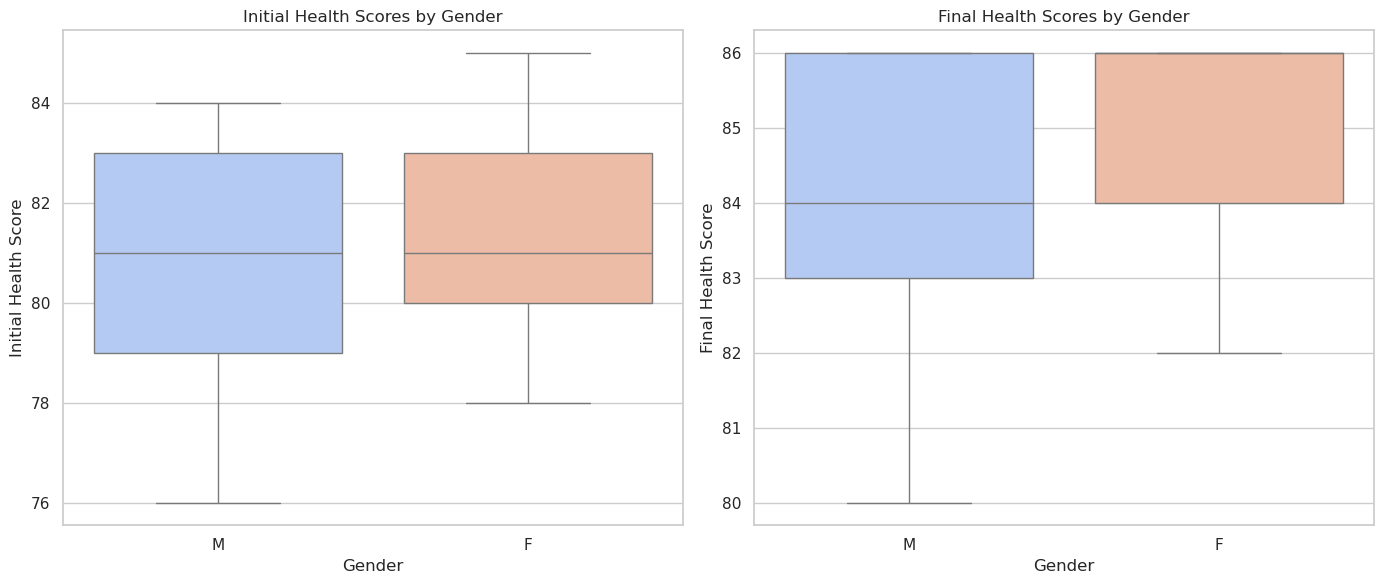

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the dataframe
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Create a figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot of Health Scores by Gender
sns.boxplot(x="Gender", y="InitialHealthScore", data=df, ax=axes[0], palette="coolwarm")
axes[0].set_title("Initial Health Scores by Gender")
axes[0].set_ylabel("Initial Health Score")

sns.boxplot(x="Gender", y="FinalHealthScore", data=df, ax=axes[1], palette="coolwarm")
axes[1].set_title("Final Health Scores by Gender")
axes[1].set_ylabel("Final Health Score")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show(renderer="png")


The above figures seem to show that for both males and females, health scores have increased. This can be seen through an increase in minimum, first quartile, median, third quartile and maximum for both genders. However, now I shall perform a more rigorous check using bootstrapping and confidence intervals. 

In [ ]:


# Original dataset
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Number of bootstrap samples to generate
n_bootstrap_samples = 100

# Function to generate a bootstrapped dataset
def generate_bootstrap(df, n_samples):
    return df.sample(n=n_samples, replace=True)

# Create a list of bootstrapped datasets
bootstrapped_datasets = [generate_bootstrap(df, len(df)) for _ in range(n_bootstrap_samples)]

# Display the first bootstrapped dataset as an example
bootstrapped_datasets[0]


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Original dataset
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Number of bootstrap samples to generate
n_bootstrap_samples = 1000

# Function to generate a bootstrapped dataset
def generate_bootstrap(df, n_samples):
    return df.sample(n=n_samples, replace=True)

# Generate a list of bootstrapped datasets
bootstrapped_datasets = [generate_bootstrap(df, len(df)) for _ in range(n_bootstrap_samples)]

# Calculate the mean of FinalHealthScore for each bootstrapped dataset
bootstrap_means = [dataset["FinalHealthScore"].mean() for dataset in bootstrapped_datasets]

# Calculate the mean of the bootstrapped sample means
bootstrap_mean = np.mean(bootstrap_means)

# Calculate the 95% confidence interval (2.5th and 97.5th percentiles)
ci_lower = np.percentile(bootstrap_means, 2.5)
ci_upper = np.percentile(bootstrap_means, 97.5)

# Print the results
print(f"Bootstrap Mean: {bootstrap_mean:.2f}")
print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

# Create a plot to visualize the distribution of the bootstrapped means and the confidence interval
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_means, kde=True, color='blue')
plt.axvline(ci_lower, color='red', linestyle='--', label=f'95% CI Lower ({ci_lower:.2f})')
plt.axvline(ci_upper, color='green', linestyle='--', label=f'95% CI Upper ({ci_upper:.2f})')
plt.axvline(bootstrap_mean, color='black', linestyle='-', label=f'Mean ({bootstrap_mean:.2f})')
plt.title("Distribution of Bootstrapped Means with 95% Confidence Interval")
plt.xlabel("Mean Final Health Score")
plt.ylabel("Frequency")
plt.legend()

# Show the plot
plt.show(renderer="png")


The initial mean healthscore is 81.0. This means that the null hypothesis is that the final mean health score is 81.0. Therefore if the confidence interval does not include 81.0(every simulation I ran the CI did not include 81), we feel that we have enough evidence to reject the null hypothethis. We are 95% confident that the drug did have an effect on the mean health score of the patients. 

9: Yes

Chatbot Links:https://chatgpt.com/share/66ff3afb-0ed0-8010-973e-aafd0b759e2e
In this conversation, you provided a dataset related to health scores for patients who received AliTech's vaccine, and we worked through several tasks:
Visualization of Health Scores by Gender: We created boxplots to compare initial and final health scores between male and female patients.
Bootstrapping: You requested code to generate a bootstrapped dataset, and I provided a Python function to generate 1000 bootstrapped samples from the original data.
Visualization of Bootstrapped Means: We calculated the means of the bootstrapped datasets and visualized the distribution of those means.
Confidence Interval: I provided code to calculate the 95% confidence interval for the bootstrapped means and displayed it visually.
Initial Average Health Score: We calculated the initial average health score across all patients, which was 81.0.


https://chatgpt.com/share/66ff3c98-6db0-8010-ae01-218500c5206e
We discussed the distinction between the standard error of the mean (SEM) and the standard deviation (SD), highlighting that SD measures the variability of data, while SEM reflects the accuracy of the sample mean as an estimate of the population mean. We then explored how to create a 95% confidence interval (CI) using SEM and why 1.96 is used (due to the properties of the normal distribution).

You asked how to create a 95% bootstrapped CI without using the SEM, and I explained the method involving bootstrapped sample means and percentiles. I provided Python code for generating a 95% bootstrap CI for the population mean and noted how to modify it to compute CIs for other parameters, such as the median.

Finally, we discussed why it's crucial to distinguish between the population parameter and the sample statistic when constructing confidence intervals, emphasizing that CIs are designed to estimate the population parameter based on the sample statistic, while accounting for sampling variability.